# 图像的傅里叶变换
Hawk Wang


** 请关注我的知乎专栏[https://zhuanlan.zhihu.com/hawkcp], 获取更多信息 **


### 0. 导入必要的库
首先还是将这里用到的所有的python package引用进来

- Image及skimage中的imread: 用于读取图像
- numpy: 用于用矩阵形式来管理图像
- matplotlib: 用于可视化数据
- cv2: 即OpenCV，用于对图像进行高级的处理
- scipy.fftpack: 傅里叶变化库

特别注意的是，为了在notebook中顺利的可视化图像，通常需要加入如下这一句：

```%matplotlib inline```

In [275]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.io import imread
from scipy.fftpack import ifftn, fft2, ifft2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmath
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

### 1. 二维傅里叶变换与反变换

### 1.1 画出普通图像的傅里叶变换结果

下面的代码显示了如何将输入图像进行傅里叶变换。傅里叶变换的结果是复数数组，所以我还展示了如何获取其实部和虚部，并求取其幅度。接下来，由于变换后图像的频谱分布具有中心对称性，因此我还将其频谱中心移到了图像的中间并进行显示。

In [276]:
def fliproi(img,ranges):
    roi=img[ranges[0]:ranges[1], ranges[2]:ranges[3]]
    roi=np.flip(roi,1)
    roi=np.flip(roi,0)
    img[ranges[0]:ranges[1], ranges[2]:ranges[3]]=roi
        
img=cv2.imread('./imgs/lena.png', cv2.IMREAD_GRAYSCALE)

def getShiftedFreqSpectrum(img):
    fimg=fft2(img, shape=img.shape, axes=tuple((0, 1)))
    fimgamp=np.abs(fimg)
    fimgphase=np.angle(fimg)
    roilen=img.shape[0]//2
    for y in [0,1]:
        for x in [0, 1]:
            ranges=[y*roilen, (y+1)*roilen,x*roilen,(x+1)*roilen]
            fliproi(fimgamp,ranges)
            fliproi(fimgphase,ranges)
    return fimg, fimgamp, fimgphase

def getFreqSpectrum(img):
    fimg=fft2(img, shape=img.shape, axes=tuple((0, 1)))
    fimgamp=np.abs(fimg)
    fimgphase=np.angle(fimg)
    return fimg, fimgamp, fimgphase

fimg,fimgamp, fimgphase=getShiftedFreqSpectrum(img)

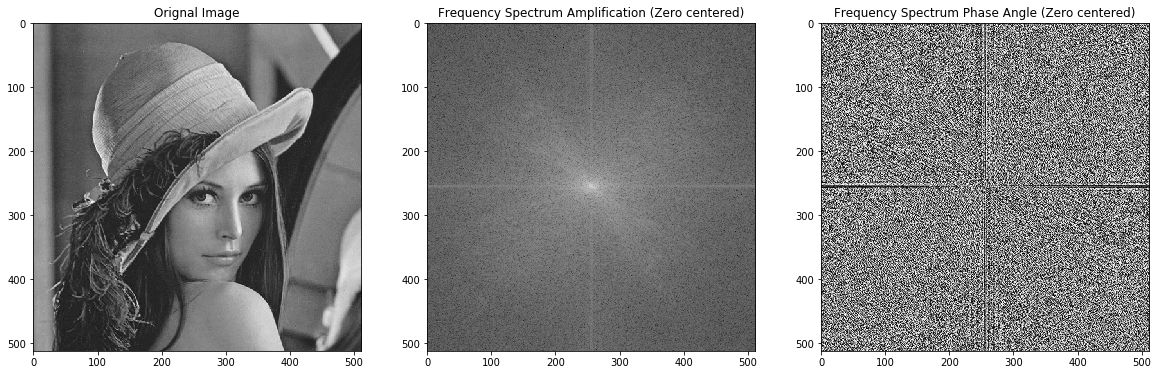

In [277]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Orignal Image")
plt.subplot(1,3,2)
plt.imshow(np.log(fimgamp), cmap="gray")
plt.title("Frequency Spectrum Amplification (Zero centered)")
plt.subplot(1,3,3)
plt.imshow(np.abs(fimgphase), cmap="gray")
plt.title("Frequency Spectrum Phase Angle (Zero centered)")
plt.show()

### 1.2 傅里叶反变换

下面这段代码首先构造出频谱图，其中特定的频谱分量有值，其他频谱分量保持为0. 我们将看到这样特意构造的频谱图其对应的空间图像是什么样子，这样可以加深你对傅里叶变换、反变换的理解。 这部分代码直接取材于scipy的官方文档。

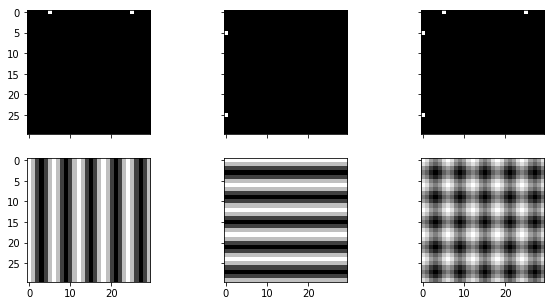

In [278]:
>>> N = 30
>>> fig=plt.figure(figsize=(10,5))
>>> ((ax1,ax2,ax3),(ax4,ax5,ax6)) = fig.subplots(2, 3, sharex='col', sharey='row')
>>> xf = np.zeros((N,N))
>>> xf[0, 5] = 1
>>> xf[0, N-5] = 1
>>> Z = ifftn(xf)
>>> ax1.imshow(xf,cmap=cm.gray)
>>> ax4.imshow(np.real(Z), cmap=cm.gray)
>>> xf = np.zeros((N, N))
>>> xf[5, 0] = 1
>>> xf[N-5, 0] = 1
>>> Z = ifftn(xf)
>>> ax2.imshow(xf, cmap=cm.gray)
>>> ax5.imshow(np.real(Z), cmap=cm.gray)
>>> xf = np.zeros((N, N))
>>> xf[0, 5] = 1
>>> xf[0, N-5] = 1
>>> xf[5, 0] = 1
>>> xf[N-5, 0] = 1
>>> Z = ifftn(xf)
>>> ax3.imshow(xf, cmap=cm.gray)
>>> ax6.imshow(np.real(Z), cmap=cm.gray)
>>> plt.show()

#### 1.3 混合两幅图像的幅度与相位

下面我将试着将两幅图像的相位与幅度混合起来。先来看看两幅图像

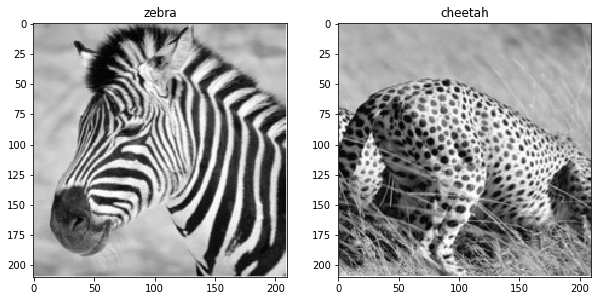

In [279]:
img1=cv2.imread('./imgs/banma.jpg', cv2.IMREAD_GRAYSCALE)
img2=cv2.imread('./imgs/liebao.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("zebra")
plt.imshow(img1,cmap=cm.gray)
plt.subplot(1,2,2)
plt.title("cheetah")
plt.imshow(img2,cmap=cm.gray)
plt.show()

来看看它们分别在频域上的幅度与相位

In [280]:
fimg1, fimgamp1, fimgphase1=getShiftedFreqSpectrum(img1)
fimg2, fimgamp2, fimgphase2=getShiftedFreqSpectrum(img2)

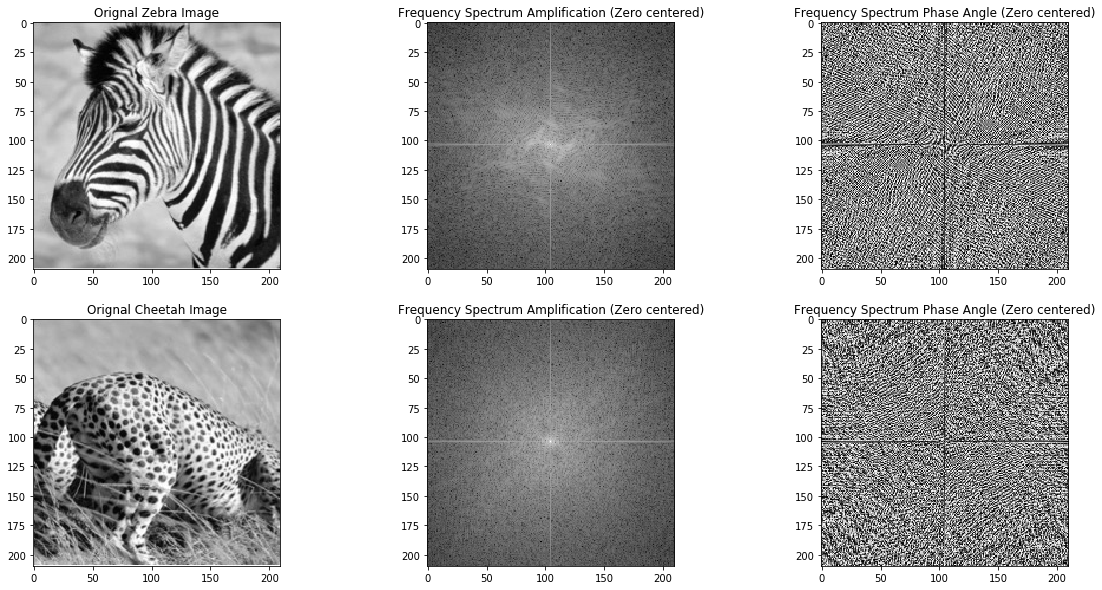

In [281]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.imshow(img1, cmap="gray")
plt.title("Orignal Zebra Image")
plt.subplot(2,3,2)
plt.imshow(np.log(fimgamp1), cmap="gray")
plt.title("Frequency Spectrum Amplification (Zero centered)")
plt.subplot(2,3,3)
plt.imshow(np.abs(fimgphase1), cmap="gray")
plt.title("Frequency Spectrum Phase Angle (Zero centered)")

plt.subplot(2,3,4)
plt.imshow(img2, cmap="gray")
plt.title("Orignal Cheetah Image")
plt.subplot(2,3,5)
plt.imshow(np.log(fimgamp2), cmap="gray")
plt.title("Frequency Spectrum Amplification (Zero centered)")
plt.subplot(2,3,6)
plt.imshow(np.abs(fimgphase2), cmap="gray")
plt.title("Frequency Spectrum Phase Angle (Zero centered)")

plt.show()

上面为了方便查看，我们将直流分量移到了频域图像的中心。但为了混合两幅图像的幅度与相位并用傅里叶反变换恢复出空域图像，我会采用不进行直流分量移动的方法，即认为0频在频域图像的左上角。

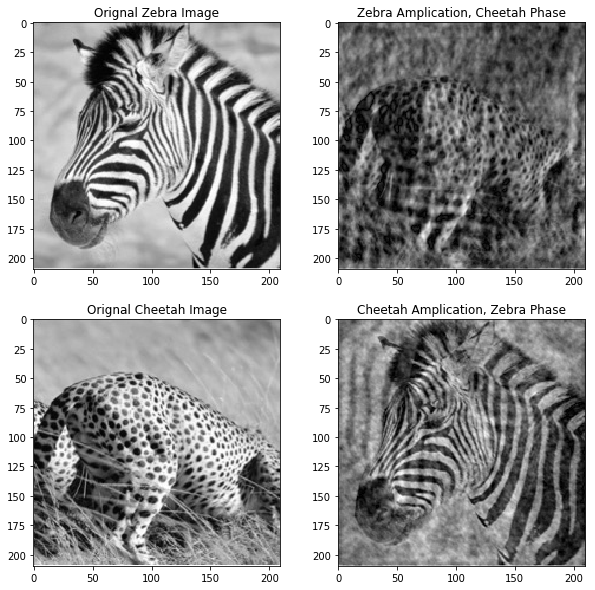

In [282]:
fimg1, fimgamp1, fimgphase1=getFreqSpectrum(img1)
fimg2, fimgamp2, fimgphase2=getFreqSpectrum(img2)

#混合斑马的相位和猎豹的幅度
fimgZebraOnCheetah=fimg1.copy()
fimgZebraOnCheetah.real=fimgamp1*np.cos(fimgphase2)
fimgZebraOnCheetah.imag=fimgamp1*np.sin(fimgphase2)

fimgCheetahOnZebra=fimg1.copy()
fimgCheetahOnZebra.real=fimgamp2*np.cos(fimgphase1)
fimgCheetahOnZebra.real=fimgamp2*np.cos(fimgphase1)
imgZebraOnCheetah=np.abs(ifft2(fimgZebraOnCheetah))
imgCheetahOnZebra=np.abs(ifft2(fimgCheetahOnZebra))

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img1, cmap="gray")
plt.title("Orignal Zebra Image")

plt.subplot(2,2,2)
plt.imshow(imgZebraOnCheetah, cmap="gray")
plt.title("Zebra Amplication, Cheetah Phase")

plt.subplot(2,2,3)
plt.imshow(img2, cmap="gray")
plt.title("Orignal Cheetah Image")
plt.subplot(2,2,4)
plt.imshow(imgCheetahOnZebra, cmap="gray")
plt.title("Cheetah Amplication, Zebra Phase")

plt.show()

从上图大家可以看到，相位比幅度对视觉效果来讲更加重要。

### 2. 频域滤波



根据傅里叶变换，在空间滤波上的卷积等同于在频域上进行乘积，下面展示一下如何进行频域低通滤波.

先让我们构造一个高斯点扩散函数图，它就是我们所用的高斯滤波核：

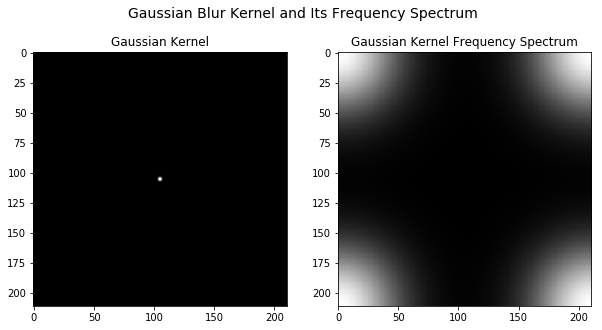

In [283]:
from scipy import signal
def gkern(kernlen=22, std=3):
    """Returns a 2D Gaussian kernel array."""
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

def gkern1(kernlen=22, std=3):
    """Returns a 2D Gaussian kernel array."""
    gkern2d=np.zeros((kernlen, kernlen), np.float32)
    gkern2d[kernlen//2, kernlen//2]=1
    gkern2d=cv2.GaussianBlur(gkern2d, (kernlen, kernlen), std)
    return gkern2d

if img1.shape[0] % 2 == 0:
    img1b=np.zeros((img1.shape[0]+1, img1.shape[1]+1), img1.dtype)
    img1b[0:img1.shape[0], 0:img1.shape[1]]=img1
    fimg1, fimgamp1, fimgphase1=getFreqSpectrum(img1b)
gkernel = gkern1(img1b.shape[0], 1)
fkernel, fkernelamp, fkernelphase=getFreqSpectrum(gkernel)
# fkernel, fkernelamp, fkernelphase=getShiftedFreqSpectrum(gkernel)
plt.figure(figsize=(10,5))
plt.suptitle("Gaussian Blur Kernel and Its Frequency Spectrum", fontsize=14)
plt.subplot(1,2,1)
plt.imshow(gkernel, cmap="gray")
plt.title("Gaussian Kernel")
plt.subplot(1,2,2)
plt.imshow(fkernelamp, cmap="gray")
plt.title("Gaussian Kernel Frequency Spectrum")
plt.show()

现在来看看两种分别在空域和频域上进行滤波的结果, 可以看到差异非常小。 这些小的差异应该是计算精度导致的。

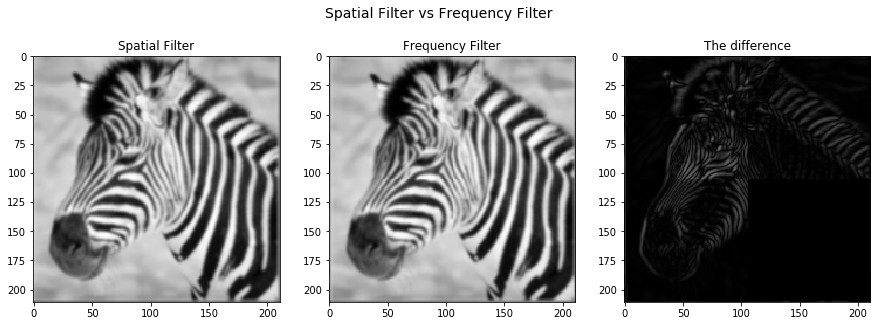

In [284]:
img1filtered1=cv2.GaussianBlur(img1b, (img1b.shape[0], img1b.shape[1]), 1)
fimg1filtere2=fkernel*fimg1 
img1filtered2=np.abs(ifft2(fimg1filtere2))
roilen=img1b.shape[0]//2
for y in [0,1]:
        for x in [0, 1]:
            ranges=[y*roilen, (y+1)*roilen,x*roilen,(x+1)*roilen]
            fliproi(img1filtered2,ranges)
img1filtered2=cv2.flip(img1filtered2, -1)
img1filtered2=(img1filtered2 - img1filtered2.min())/(img1filtered2.max()-img1filtered2.min()) * 255
img1filtered1=(img1filtered1 - img1filtered1.min())/(img1filtered1.max()-img1filtered1.min()) * 255

plt.figure(figsize=(15,5))
plt.suptitle("Spatial Filter vs Frequency Filter", fontsize=14)
plt.subplot(1,3,1)
plt.imshow(img1filtered1, cmap="gray")
plt.title("Spatial Filter")
plt.subplot(1,3,2)
plt.imshow(img1filtered2, cmap="gray")
plt.title("Frequency Filter")
plt.subplot(1,3,3)
plt.imshow(np.abs(img1filtered2-img1filtered1), cmap="gray")
plt.title("The difference")
plt.show()

### 3. 总结

我在专栏中讲到了图像的傅里叶变换，并介绍了图像的频域滤波，讲到了图像的采样与频域的关系。这份Notebook用一些实例来展示了相关知识。

欢迎你继续关注本仓库，也欢迎关注我的知乎专栏 ”计算摄影学“：https://zhuanlan.zhihu.com/hawkcp